In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import file path
file_path = "C:\\Users\\adity\\Desktop\\Python\\sales_data.csv"
#read csv file
sales = pd.read_csv(file_path)

In [2]:
#display first 5 rows of the dataframe
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [3]:
# Shape of the dataframe
sales.shape
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [4]:
# Numerical Analysis and Visualization
sales["Unit_Cost"].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

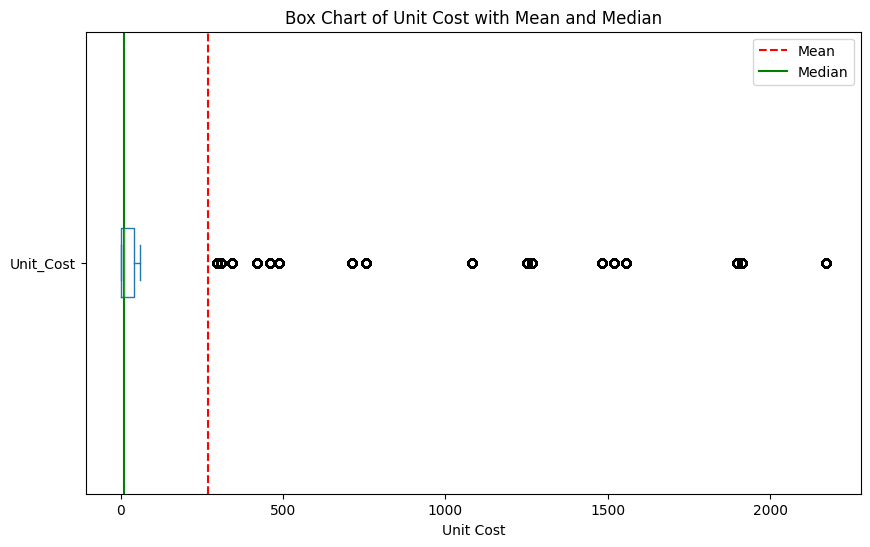

In [23]:
fig, axe = plt.subplots(figsize=(10, 6))

# Plot the box chart on the created axis
sales["Unit_Cost"].plot(kind='box', vert=False, ax=axe)

# vertical lines for mean and median
axe.axvline(sales["Unit_Cost"].mean(), color='red', linestyle='--', label="Mean")
axe.axvline(sales["Unit_Cost"].median(), color='green', linestyle='-', label="Median")

plt.title("Box Chart of Unit Cost with Mean and Median")
plt.xlabel("Unit Cost")
plt.legend()
plt.show()

Text(0.5, 0, 'Unit Cost')

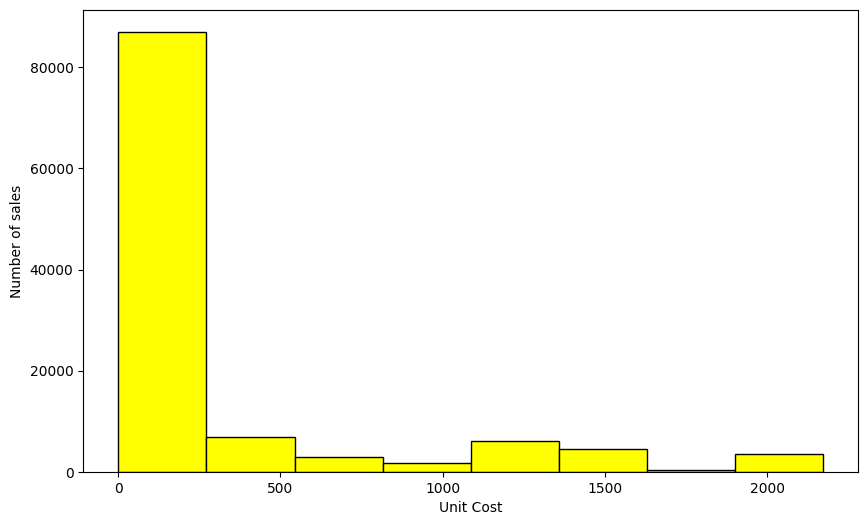

In [27]:
# Distribution of Sales using Histogram
ax = sales["Unit_Cost"].plot(kind='hist', bins=8, figsize=(10,6), color = "yellow", edgecolor='black') 
ax.set_ylabel('Number of sales') 
ax.set_xlabel('Unit Cost') 

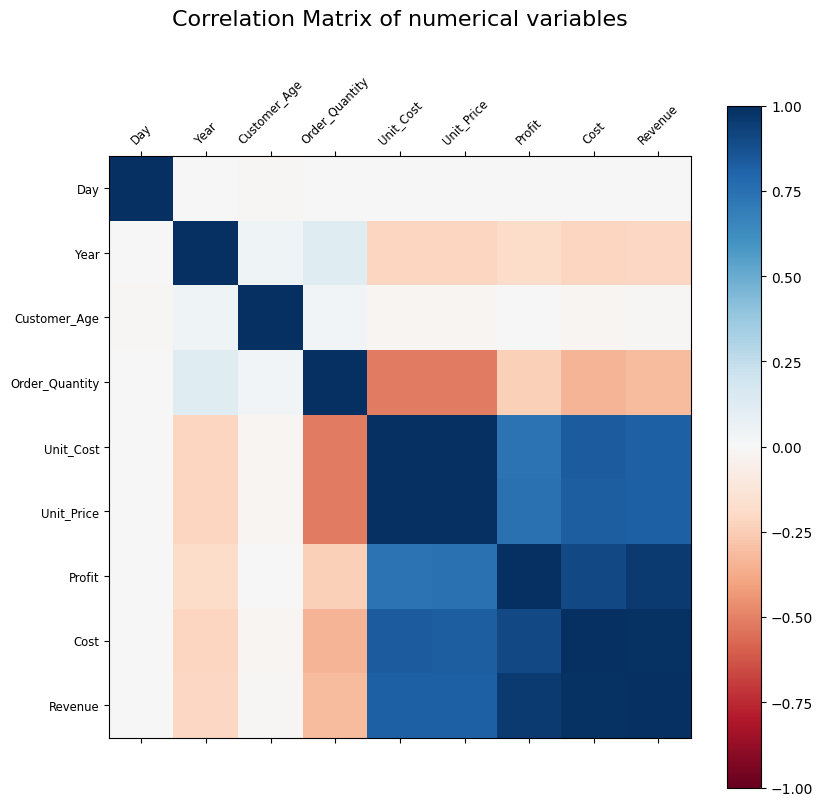

In [32]:
# Relationship between Numerical Variables
# Computing correlation only for numeric columns
corr = sales.select_dtypes(include=[np.number]).corr() 
corr
fig = plt.figure(figsize=(8,8), num=1) # Creating whole window with size 12*10 inches
ax = fig.add_subplot(1,1,1) # Creating a single plot in the window
# Set the title of the plot
plt.title('Correlation Matrix of numerical variables', fontsize=16, pad =35)
plt.tight_layout() #automatically adjusts subplot params so that the subplot(s) fits in to the figure area
fig.align_xlabels() #aligns x labels
plt.matshow(corr, cmap = 'RdBu', fignum=0, vmin = -1, vmax= 1) # create matrix plot with colormap ranging from -1 to 1
plt.xticks(range(len(corr.columns)), corr.columns,ha="center", size = 'small', rotation=45) # x axis labels to be column names from corelation matrix
plt.yticks(range(len(corr.columns)), corr.columns, size='small', color='Black') 
cb = plt.colorbar() #legend that maps colors to correlation values
cb.ax.tick_params(labelsize=10) #colorbar legend font size

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\plotting\_matplotlib\core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\plotting\_matplotlib\core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Unit_Cost', ylabel='Revenue'>

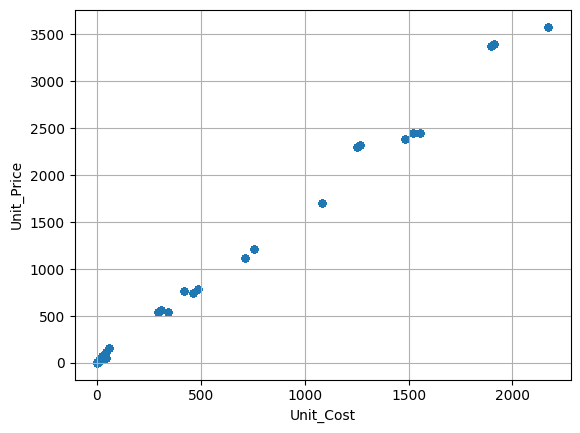

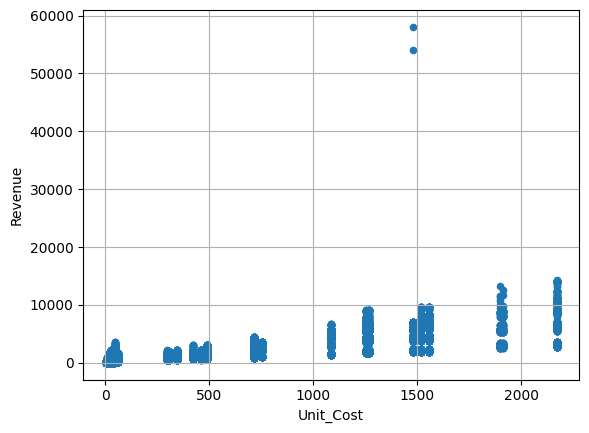

In [34]:
# Scatter plot between two numerical variables
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', colormap='viridis', grid = True)
sales.plot(kind='scatter', x='Unit_Cost', y='Revenue', colormap='viridis', grid = True)

Unit_Cost            Axes(0.125,0.653529;0.227941x0.226471)
Unit_Price        Axes(0.398529,0.653529;0.227941x0.226471)
Revenue           Axes(0.672059,0.653529;0.227941x0.226471)
Order_Quantity       Axes(0.125,0.381765;0.227941x0.226471)
dtype: object

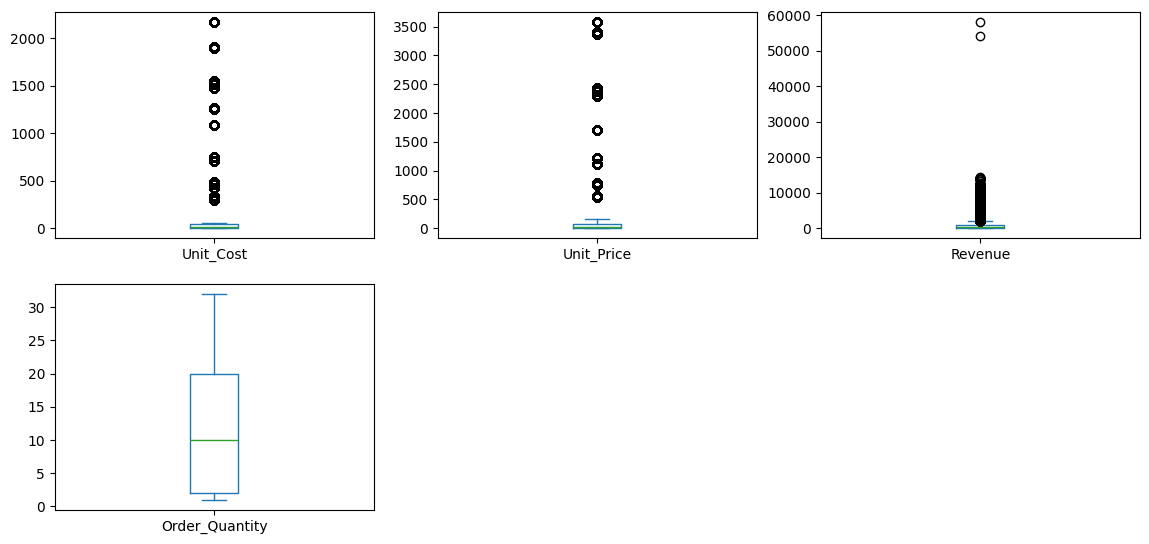

In [38]:
# Box plot for numerical data
boxplot_cols= ['Unit_Cost', 'Unit_Price', 'Revenue', 'Order_Quantity']
sales[boxplot_cols].plot(kind='box', subplots= True, layout =[3,3],figsize = (14,10))

<Axes: title={'center': 'Pie Chart of age categories'}, ylabel='count'>

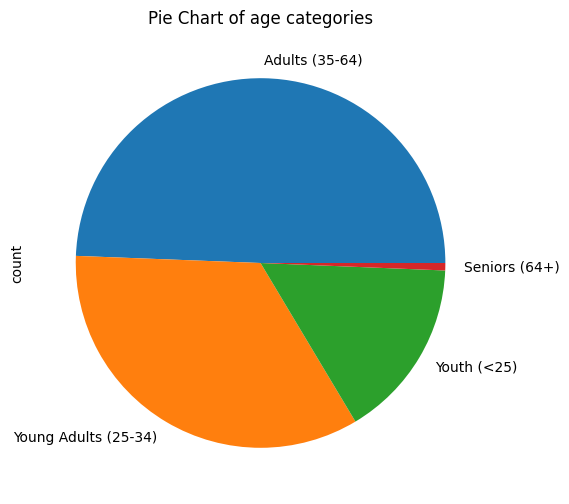

In [47]:
# Pie chart for age
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(10,6), title = 'Pie Chart of age categories')

Text(0.5, 0, 'Age Category')

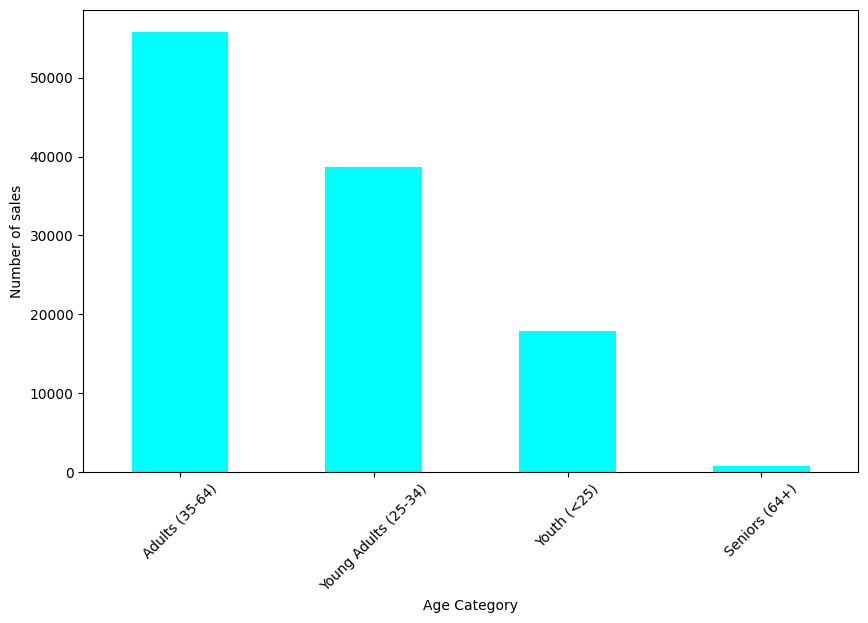

In [55]:
# Categorical Analysis and Visualization
sales['Age_Group'].value_counts()
amy = sales['Age_Group'].value_counts().plot(kind='bar',figsize=(10,6), color = "cyan")
amy.set_ylabel('Number of sales')
plt.xticks(rotation = 45)
amy.set_xlabel('Age Category')

In [61]:
# Revenue per head
sales['Revenue_per_Head'] = sales['Revenue']/sales['Customer_Age']
sales['Revenue_per_Head'].head() 
sales['Revenue_per_Head'].describe() 


count    113036.000000
mean         23.009000
std          42.256559
min           0.023529
25%           1.850000
50%           6.563636
75%          24.318182
max        1116.807692
Name: Revenue_per_Head, dtype: float64

<Axes: xlabel='Calculated_Cost', ylabel='Profit'>

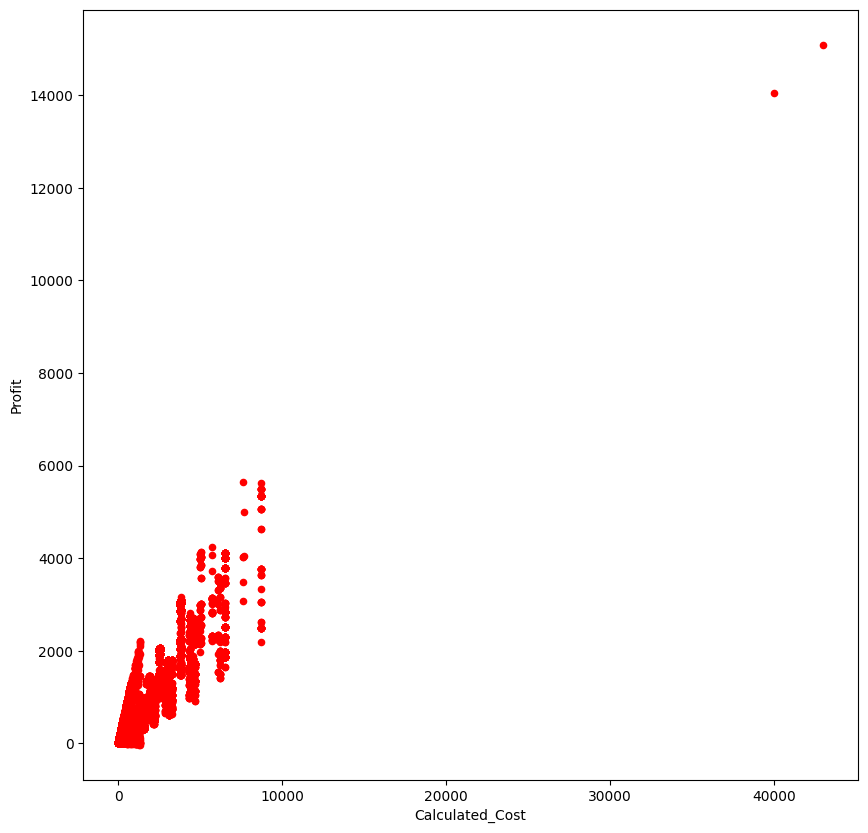

In [60]:
# Scatter plot between Calculated cost and Profit
sales['Calculated_Cost'] = sales['Unit_Cost'] * sales['Order_Quantity']
sales.plot(kind = "scatter", x= 'Calculated_Cost', y='Profit', color= "Red", figsize = (10,10))

In [64]:
# Increasing unit price by 3%
sales['Unit_Price'] += 1.3
sales['Unit_Price'].describe()

count    113036.000000
mean        456.838427
std         922.071219
min           5.900000
25%           8.900000
50%          27.900000
75%          73.900000
max        3581.900000
Name: Unit_Price, dtype: float64

 The sales per year is:  Year
2016    29398
2014    29398
2015    24443
2013    24443
2012     2677
2011     2677
Name: count, dtype: int64


Text(0.5, 0, 'Year')

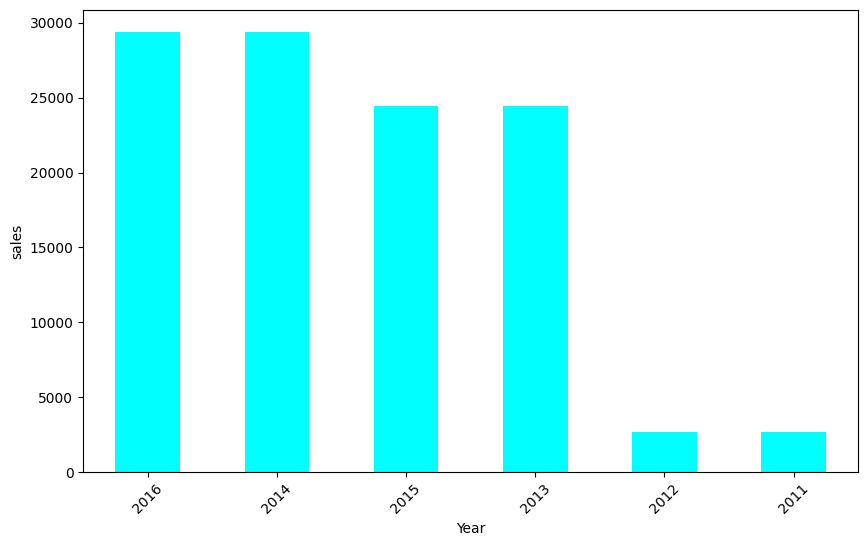

In [66]:
# Sales per year
year_sales = sales['Year'].value_counts()
print(" The sales per year is: ", year_sales)
amy = sales['Year'].value_counts().plot(kind='bar',figsize=(10,6), color = "cyan")
amy.set_ylabel('sales')
plt.xticks(rotation = 45)
amy.set_xlabel('Year')


<Axes: ylabel='count'>

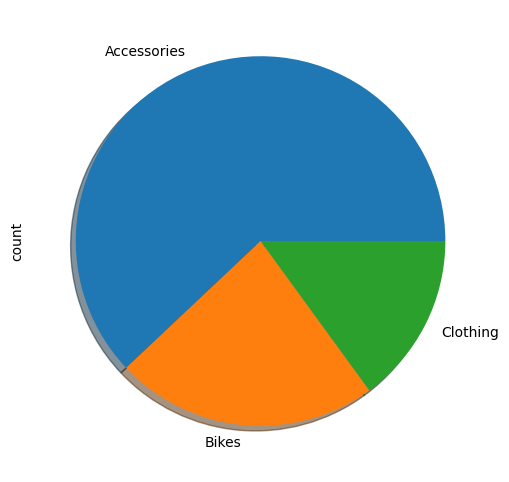

In [73]:
# Sales per category
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(10,6), shadow = True)

In [75]:
# How many men had more than 500 in revenue?
# loc() function for accessing labels "row" here 
men_500 = sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 500)].shape[0]
print(men_500, "Men had more than 500 AUD in revenue")

8 Men had more than 500 AUD in revenue


In [ ]:
# Top 10 sales with highest revenue
sales_10 = sales.sort_values(['Revenue'], ascending=True).head(10)
print("The top ten sales with highest revenue is: ", sales_10)

The top ten sales with highest revenue is:               Date  Day     Month  Year  Customer_Age             Age_Group  \
92235  2016-07-19   19      July  2016            34  Young Adults (25-34)   
80491  2016-06-23   23      June  2016            46        Adults (35-64)   
93369  2016-01-17   17   January  2016            29  Young Adults (25-34)   
85310  2014-01-12   12   January  2014            33  Young Adults (25-34)   
99239  2014-07-08    8      July  2014            37        Adults (35-64)   
99241  2016-07-08    8      July  2016            37        Adults (35-64)   
99285  2016-05-30   30       May  2016            37        Adults (35-64)   
90433  2016-03-17   17     March  2016            23           Youth (<25)   
88262  2014-02-10   10  February  2014            36        Adults (35-64)   
88265  2016-02-10   10  February  2016            36        Adults (35-64)   

      Customer_Gender         Country              State Product_Category  \
92235               